<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/ANNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
# importing the data
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]

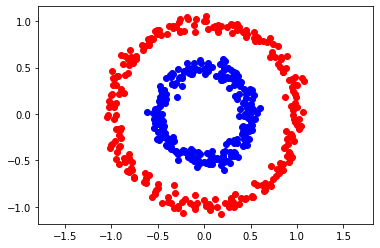

In [ ]:
# Dots and their classes represented by colors
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='red')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='blue')
plt.axis('equal')
plt.show()

In [ ]:
class Funky():
  def __init__(self, function, vars):
    self.func = sp.utilities.lambdify(vars, function)
    derivative = sp.diff(function, vars)
    self.prime = sp.utilities.lambdify(vars, derivative)

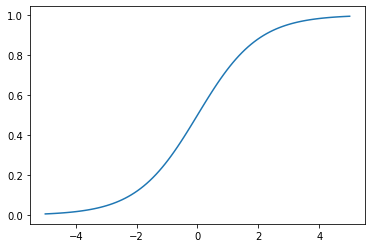

In [ ]:
# Activation Functions and their derivatives
x =  sp.Symbol('x')
sig = Funky(1 / (1 + np.e ** (-x)), x)
sigmoid = (lambda x: 1 / (1 + np.e ** (-x)),
           sig.prime)

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigmoid[0](_x))
plt.show()


In [ ]:
#layer clase
class Dense():
  def __init__(self, n_inputs, n_neurons, activation):

    self.act = activation
    self.biases = np.random.rand(1, n_neurons) * 2 - 1
    self.weights = np.random.rand(n_inputs, n_neurons) * 2 -1

In [ ]:
def create_nn(topology, act_f):

  nn = []

  for il, layer in enumerate(topology[:-1]):
    nn.append(Dense(topology[il], topology[il + 1], act_f))
  return nn


In [ ]:
topology = [p, 4, 8, 1]

network = create_nn(topology, sigmoid)

mse = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
       lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, loss_f, lr=0.5, train=True):

  out = [(None, X)]

  for i, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[i].weights + neural_net[i].biases
    a = neural_net[i].act[0](z)
    out.append((z, a))

  if train:
    deltas = []
    for i in reversed(range(0, len(neural_net))):
      print('caca')

      z = out[i + 1][0]
      a = out[i + 1][1]
      print(i)
      #print('popo: ', out[i+1][0])

      if i == len(neural_net) - 1:
        deltas.insert(0, loss_f[1](a, Y) * neural_net[i].act[1](z))
      else:
        deltas.insert(0, deltas[0] @ _w.T * neural_net[i].act[1](z))
      
      _w = neural_net[i].weights

      #gradient

      neural_net[i].biases = neural_net[i].biases - np.mean(deltas[0], axis= 0, keepdims=True) * lr
      neural_net[i].weights = neural_net[i].weights - out[i][1].T @ deltas[0] * lr

  return out[-1][1]

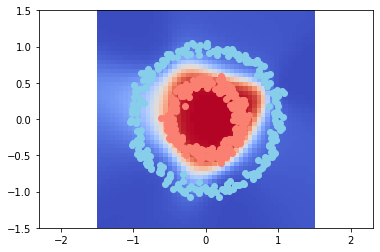

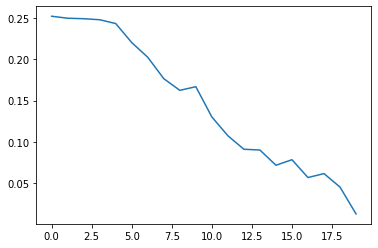

KeyboardInterrupt: ignored

In [ ]:
import time
from IPython.display import clear_output

neural_net = create_nn(topology, sigmoid)

loss = []

for i in range(1000):

  py = train(neural_net, X, Y, mse, lr=0.05) # prediction y

  if i % 25 == 0:

    loss.append(mse[0](py, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, mse, train=False)[0][0]
    
    
    
    plt.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.25)
  